In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1322 files belonging to 3 classes.


In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 60 files belonging to 3 classes.


In [24]:
cnn = tf.keras.models.Sequential()

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [34]:
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [35]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5272 - loss: 0.9700 - val_accuracy: 0.8000 - val_loss: 0.5437
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7625 - loss: 0.5506 - val_accuracy: 0.9000 - val_loss: 0.3577
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8707 - loss: 0.3566 - val_accuracy: 0.7667 - val_loss: 0.5663
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9077 - loss: 0.2378 - val_accuracy: 0.8333 - val_loss: 0.5005
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9259 - loss: 0.2151 - val_accuracy: 0.8667 - val_loss: 0.3240
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9569 - loss: 0.1377 - val_accuracy: 0.9167 - val_loss: 0.3514
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9644 - loss: 0.1055 - val_accuracy: 0.9333 - val_loss: 0.3111
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9728 - loss: 0.0876 - val_accuracy: 0.9667 - val_loss:

In [38]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 468ms/step - accuracy: 0.9924 - loss: 0.0285
Training accuracy: 0.9924356937408447


In [39]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.9500 - loss: 0.3278
Validation accuracy: 0.949999988079071


In [40]:
cnn.save('trained_plant_disease_model.keras')

In [41]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5272314548492432,
  0.7624810934066772,
  0.8706505298614502,
  0.9077155590057373,
  0.925869882106781,
  0.9568834900856018,
  0.9644477963447571,
  0.9727685451507568,
  0.9667171239852905,
  0.9780635237693787],
 'loss': [0.9700103402137756,
  0.5506303906440735,
  0.3565834164619446,
  0.23784694075584412,
  0.21508511900901794,
  0.13768750429153442,
  0.10549258440732956,
  0.08760377764701843,
  0.08540734648704529,
  0.061047811061143875],
 'val_accuracy': [0.800000011920929,
  0.8999999761581421,
  0.7666666507720947,
  0.8333333134651184,
  0.8666666746139526,
  0.9166666865348816,
  0.9333333373069763,
  0.9666666388511658,
  0.949999988079071,
  0.949999988079071],
 'val_loss': [0.5437335968017578,
  0.3577028214931488,
  0.5662763118743896,
  0.5004578232765198,
  0.3239988386631012,
  0.3513551652431488,
  0.31108996272087097,
  0.10939384996891022,
  0.17769251763820648,
  0.32777273654937744]}

In [42]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [43]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


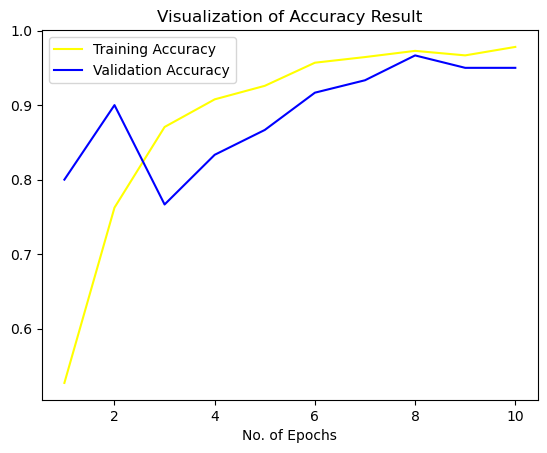

In [55]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='yellow',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [45]:
class_name = validation_set.class_names

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 60 files belonging to 3 classes.


In [48]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [49]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [50]:
Y_true

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [51]:
predicted_categories

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [53]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     Healthy       0.95      0.90      0.92        20
     Powdery       0.91      1.00      0.95        20
        Rust       1.00      0.95      0.97        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



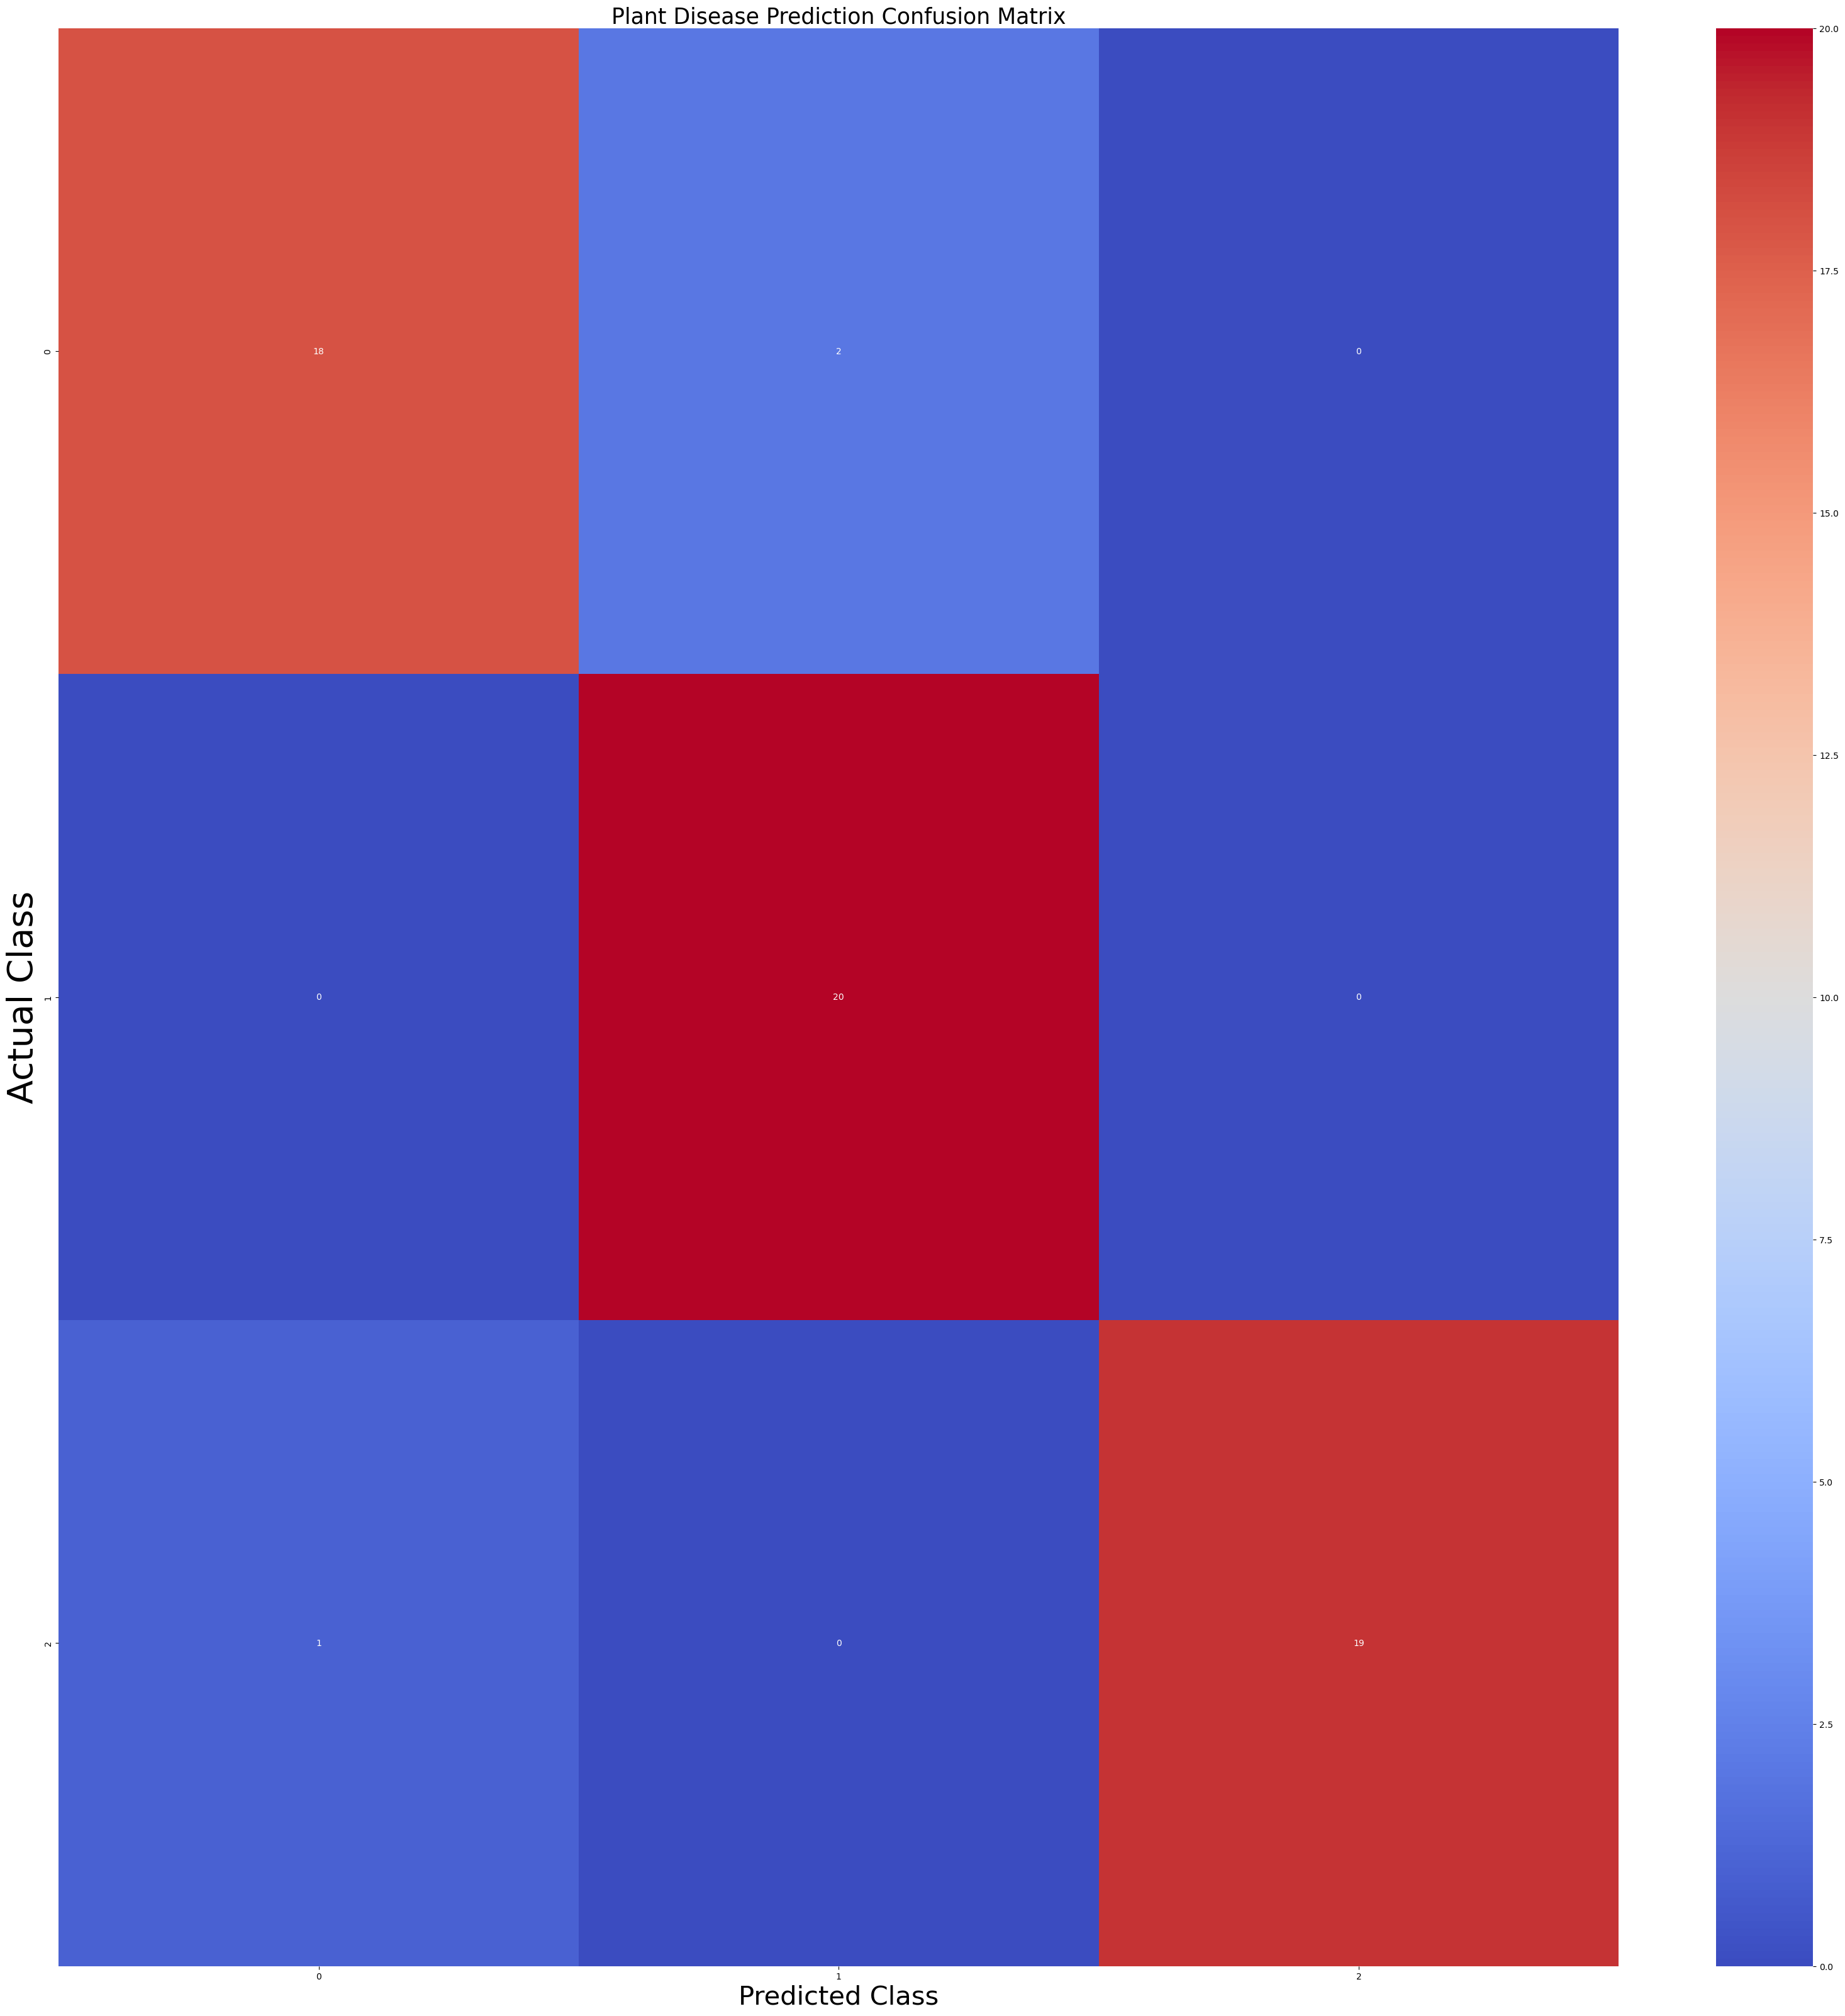

In [54]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='coolwarm')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()